In [155]:
#pip install pydotplus

In [156]:
#conda install graphviz

In [157]:
#pip install graphviz

In [158]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn import preprocessing  # imputing and scale
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import matplotlib.pyplot as plt1
pd.set_option('display.max_columns', 100) #display more jupyter notebook
pd.set_option('display.max_rows', 100)  # display rows
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score  #preditive accuracy
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score  #recall
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import f1_score  #f1 score
from sklearn.metrics import roc_curve #plot roc curve
from sklearn.metrics import precision_recall_curve  # plot precision recall
from sklearn.linear_model import LogisticRegression
import itertools 
from sklearn.metrics import mean_squared_error   #RMSE
from sklearn.metrics import mean_absolute_error  #MAE/MAD
from sklearn.neighbors import KNeighborsClassifier  # K-NN classification algorithm
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

#conda install -c conda-forge dmba 
#from dmba import plotDecisionTree  #pip install dmba
#dmba is dependent on pydotplus and graphviz
#conda install graphviz
#conda install -c conda-forge pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import graphviz

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import plot_tree

from sklearn.model_selection import GridSearchCV

import matplotlib
import matplotlib.pyplot as pl


# Section 1 - Data Preprocessing, EDA, Visualizations

# Load data

In [159]:
df = pd.read_csv('output.csv')
df.head()

,CustomerId,AppointmentID,Cust Age,Cust Gender,Build Year,Vehicle Age,Vehicle Type,Vehicle OEM,Appointment Day,AppointmentDay,ScheduledDate,ScheduledDay,Issue Arena,Issue Criticality,Issue Severity,Last Serviced date,no-show,SMS_received,Reminder received,Techinician assigned,New Issue
0,576784,4383521,25,Male,2015,7,SUV,Tesla,07/14/2022,Thursday,07-20-2022 2:32,Wednesday,Replace remote battery,3,5,05-16-2019,False,True,True,True,True
1,4612731,2292304,41,Male,2020,2,Hatchback,Nissan,02/03/2022,Thursday,02-22-2022 1:59,Tuesday,Engine repair,10,10,09-22-2020,False,True,False,False,True
2,3055019,590799,47,Male,2008,14,Coupe,Audi,03/22/2022,Tuesday,03-25-2022 6:31,Friday,Resurface front rotors,6,7,07-16-2016,False,False,True,True,False
3,4116171,4493453,20,Female,2005,17,Convertible,Buick,07/11/2022,Monday,07-21-2022 1:18,Thursday,Brake System repair,10,10,06-11-2009,False,False,True,False,True
4,1312820,6728212,59,Female,2003,19,Sedan,Hyundai,07/07/2022,Thursday,07-25-2022 1:59,Monday,Air Bag Repair,10,10,10-25-2007,False,False,False,True,True


# Data Exploration and Preprocessing



In [160]:
df.columns

Index(['CustomerId', 'AppointmentID', 'Cust Age', 'Cust Gender', 'Build Year',
       'Vehicle Age', 'Vehicle Type', 'Vehicle OEM', 'Appointment Day',
       'AppointmentDay', 'ScheduledDate', 'ScheduledDay', 'Issue Arena',
       'Issue Criticality', 'Issue Severity', 'Last Serviced date', 'no-show',
       'SMS_received', 'Reminder received', 'Techinician assigned',
       'New Issue'],
      dtype='object')

In [161]:
#dropping build year column
dfo = df.drop('Build Year', axis=1)

In [162]:
df.shape

(316916, 21)

In [163]:
df.duplicated().sum()
# There are no duplicate values in the dataset

0

In [164]:
df.isna().sum()
# There are no null values in the dataset

CustomerId              0
AppointmentID           0
Cust Age                0
Cust Gender             0
Build Year              0
Vehicle Age             0
Vehicle Type            0
Vehicle OEM             0
Appointment Day         0
AppointmentDay          0
ScheduledDate           0
ScheduledDay            0
Issue Arena             0
Issue Criticality       0
Issue Severity          0
Last Serviced date      0
no-show                 0
SMS_received            0
Reminder received       0
Techinician assigned    0
New Issue               0
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316916 entries, 0 to 316915
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CustomerId            316916 non-null  int64 
 1   AppointmentID         316916 non-null  int64 
 2   Cust Age              316916 non-null  int64 
 3   Cust Gender           316916 non-null  object
 4   Build Year            316916 non-null  int64 
 5   Vehicle Age           316916 non-null  int64 
 6   Vehicle Type          316916 non-null  object
 7   Vehicle OEM           316916 non-null  object
 8   Appointment Day       316916 non-null  object
 9   AppointmentDay        316916 non-null  object
 10  ScheduledDate         316916 non-null  object
 11  ScheduledDay          316916 non-null  object
 12  Issue Arena           316916 non-null  object
 13  Issue Criticality     316916 non-null  int64 
 14  Issue Severity        316916 non-null  int64 
 15  Last Serviced dat

There are no missing values
The ScheduledDate, Appointment Day and Last Serviced date columns are formatted as object instead of date-time.
Appointment Day is spelt incorrectly instead of AppointmentDate.
Most columns have a space in their column names (underscores are preferred)
Columns with index 12,13,18,19 should be categories, since they have a finite number of entries (They are 'Yes' or 'No' columns)

In [166]:
df.describe()

,CustomerId,AppointmentID,Cust Age,Build Year,Vehicle Age,Issue Criticality,Issue Severity
count,3.169160e+05,3.169160e+05,316916.000000,316916.000000,316916.000000,316916.000000,316916.000000
mean,2.363776e+06,4.522355e+06,39.024038,2011.501369,10.498631,5.457721,6.181969
std,1.337468e+06,2.546747e+06,12.394652,6.344409,6.344409,3.184691,3.162066
min,4.742000e+04,1.041850e+05,-15.000000,1990.000000,0.000000,1.000000,1.000000
25%,1.207404e+06,2.320109e+06,28.000000,2006.000000,5.000000,2.000000,3.000000
50%,2.364852e+06,4.526221e+06,39.000000,2012.000000,10.000000,5.000000,6.000000
75%,3.520890e+06,6.728966e+06,50.000000,2017.000000,16.000000,9.000000,10.000000
max,4.679978e+06,8.933437e+06,102.000000,2022.000000,32.000000,10.000000,10.000000


We have lowest age as - 15, which is impossible.

Changing columns to lowercase and replacing ' ' with '_'

In [167]:
df.rename(columns = lambda x: x.lower().replace(' ','_'), inplace = True)
df.columns
df.rename(columns = lambda x: x.lower().replace('-','_'), inplace = True)
df.columns

Index(['customerid', 'appointmentid', 'cust_age', 'cust_gender', 'build_year',
       'vehicle_age', 'vehicle_type', 'vehicle_oem', 'appointment_day',
       'appointmentday', 'scheduleddate', 'scheduledday', 'issue_arena',
       'issue_criticality', 'issue_severity', 'last_serviced_date', 'no_show',
       'sms_received', 'reminder_received', 'techinician_assigned',
       'new_issue'],
      dtype='object')

In [168]:
df.sms_received.unique()

array([ True, False])

In [169]:
df.reminder_received.unique()

array([ True, False])

In [170]:
df.techinician_assigned.unique()

array([ True, False])

In [171]:
df.new_issue.unique()

array([ True, False])

All True or False columns have appropriate values

In [172]:
# Correcting wrongly spelt columns
df.rename(columns = {'appointment_day':'Appointment_Date'}, inplace = True)
df.rename(columns = {'techinician_assigned':'technician_assigned'}, inplace = True)
df.columns

Index(['customerid', 'appointmentid', 'cust_age', 'cust_gender', 'build_year',
       'vehicle_age', 'vehicle_type', 'vehicle_oem', 'Appointment_Date',
       'appointmentday', 'scheduleddate', 'scheduledday', 'issue_arena',
       'issue_criticality', 'issue_severity', 'last_serviced_date', 'no_show',
       'sms_received', 'reminder_received', 'technician_assigned',
       'new_issue'],
      dtype='object')

In [173]:
# Conversion to datetime
df['Appointment_Date'] = pd.to_datetime(df['Appointment_Date'])
df['last_serviced_date'] = pd.to_datetime(df['last_serviced_date'])
df['scheduleddate'] = (pd.to_datetime(df['scheduleddate'].replace(":60",":59", regex=True)) +  
             pd.Timedelta(1, 'min'))
df['scheduleddate'] = pd.to_datetime(df['scheduleddate'])
df.head(2)

,customerid,appointmentid,cust_age,cust_gender,build_year,vehicle_age,vehicle_type,vehicle_oem,Appointment_Date,appointmentday,scheduleddate,scheduledday,issue_arena,issue_criticality,issue_severity,last_serviced_date,no_show,sms_received,reminder_received,technician_assigned,new_issue
0,576784,4383521,25,Male,2015,7,SUV,Tesla,2022-07-14,Thursday,2022-07-20 02:33:00,Wednesday,Replace remote battery,3,5,2019-05-16,False,True,True,True,True
1,4612731,2292304,41,Male,2020,2,Hatchback,Nissan,2022-02-03,Thursday,2022-02-22 02:00:00,Tuesday,Engine repair,10,10,2020-09-22,False,True,False,False,True


Drop rows where age is < 0 and >= 100

In [174]:
df.drop(df.index[df['cust_age']<0], inplace = True)
df.drop(df.index[df['cust_age']>100], inplace = True)


In [175]:
# Categorizing scheduled day and appointment day into 'Weekday' and 'Weekend'

df[['appointmentday']] = df[['appointmentday']].replace(dict.fromkeys(['Monday','Tuesday','Wednesday','Thursday','Friday'], 'Weekday'))
df[['appointmentday']] = df[['appointmentday']].replace(dict.fromkeys(['Saturday','Sunday'], 'Weekend'))

df[['scheduledday']] = df[['scheduledday']].replace(dict.fromkeys(['Monday','Tuesday','Wednesday','Thursday','Friday'], 'Weekday'))
df[['scheduledday']] = df[['scheduledday']].replace(dict.fromkeys(['Saturday','Sunday'], 'Weekend'))


In [176]:
# add wait time
df['days_waited'] = df['scheduleddate'] - df['Appointment_Date']
df['days_waited'].describe()

count                       316904
mean     9 days 19:01:52.387915583
std      5 days 18:33:25.134013339
min                0 days 01:02:00
25%                4 days 12:51:00
50%               10 days 01:05:00
75%               15 days 01:13:15
max               19 days 13:00:00
Name: days_waited, dtype: object

In [177]:
# subsetting data and getting the index
neg_dw = df[df['Appointment_Date'] > df['scheduleddate']]
neg_dw.index


Int64Index([], dtype='int64')

In [178]:
#convert the days waited to string
df.days_waited = df.days_waited.astype('str', copy = True)
df['days_waited']

0          6 days 02:33:00
1         19 days 02:00:00
2          3 days 06:32:00
3         10 days 01:19:00
4         18 days 02:00:00
                ...       
316911     5 days 07:10:00
316912    16 days 12:46:00
316913    10 days 04:36:00
316914    18 days 02:35:00
316915    17 days 06:00:00
Name: days_waited, Length: 316904, dtype: object

In [179]:
# Extract only the digits from this column
df['days_waited'] = df['days_waited'].str.extract('(\d+)').astype('int')

# Preview the change
df['days_waited'].describe()

count    316904.000000
mean          9.500836
std           5.770868
min           0.000000
25%           4.000000
50%          10.000000
75%          15.000000
max          19.000000
Name: days_waited, dtype: float64

In [180]:
# group ages into bins
binedges = [18,25,60,df['cust_age'].max() + 1]
labels = ['youth', 'adult', 'seniors']
df['age_group'] = pd.cut(df['cust_age'], bins = binedges, labels = labels, right = False)


In [181]:
pid = df.customerid.value_counts()
pid.head()


1253761    5
2511760    4
747105     4
656648     4
397485     4
Name: customerid, dtype: int64

In [182]:
#removing duplicate rows for customers with different information about customer. Seem to be mistaken data
df.drop_duplicates(subset = ['customerid'], inplace = True)

In [183]:
df['technician_assigned'].replace(True, 1,inplace=True)
df['technician_assigned'].replace(False, 0,inplace=True)
df.head()

,customerid,appointmentid,cust_age,cust_gender,build_year,vehicle_age,vehicle_type,vehicle_oem,Appointment_Date,appointmentday,scheduleddate,scheduledday,issue_arena,issue_criticality,issue_severity,last_serviced_date,no_show,sms_received,reminder_received,technician_assigned,new_issue,days_waited,age_group
0,576784,4383521,25,Male,2015,7,SUV,Tesla,2022-07-14,Weekday,2022-07-20 02:33:00,Weekday,Replace remote battery,3,5,2019-05-16,False,True,True,1,True,6,adult
1,4612731,2292304,41,Male,2020,2,Hatchback,Nissan,2022-02-03,Weekday,2022-02-22 02:00:00,Weekday,Engine repair,10,10,2020-09-22,False,True,False,0,True,19,adult
2,3055019,590799,47,Male,2008,14,Coupe,Audi,2022-03-22,Weekday,2022-03-25 06:32:00,Weekday,Resurface front rotors,6,7,2016-07-16,False,False,True,1,False,3,adult
3,4116171,4493453,20,Female,2005,17,Convertible,Buick,2022-07-11,Weekday,2022-07-21 01:19:00,Weekday,Brake System repair,10,10,2009-06-11,False,False,True,0,True,10,youth
4,1312820,6728212,59,Female,2003,19,Sedan,Hyundai,2022-07-07,Weekday,2022-07-25 02:00:00,Weekday,Air Bag Repair,10,10,2007-10-25,False,False,False,1,True,18,adult


In [184]:
df.rename(columns = {'customerid':'customer_id', 'appointmentid':'appointment_id','appointment_day':'appointment_date','appointmentday':'appointment_day',
          'scheduleddate':'scheduled_date','scheduledday':'scheduled_day','techinician_assigned':'technician_assigned'},inplace = True)
df.columns

Index(['customer_id', 'appointment_id', 'cust_age', 'cust_gender',
       'build_year', 'vehicle_age', 'vehicle_type', 'vehicle_oem',
       'Appointment_Date', 'appointment_day', 'scheduled_date',
       'scheduled_day', 'issue_arena', 'issue_criticality', 'issue_severity',
       'last_serviced_date', 'no_show', 'sms_received', 'reminder_received',
       'technician_assigned', 'new_issue', 'days_waited', 'age_group'],
      dtype='object')

# Exploratory Data Analysis and Visualizations



In [185]:
#What Percentage Of Indivduals Miss Their Appointment ?
gc = df['cust_gender'].value_counts() #gender count in the dataset
gc

Male      228708
Female     77642
Name: cust_gender, dtype: int64

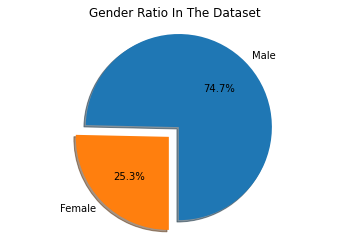

In [186]:
labels = ['Male', 'Female']
slices = [228708, 77642]
explode = [0, 0.15]
# plotting in a pie chart
plt.pie(slices, labels =labels, explode = explode, shadow = True, startangle = 270, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Gender Ratio In The Dataset");

In [187]:
# count the number of yes and nos in the no_show column and express as percentage
pct_miss = df['no_show'].value_counts(normalize = True) * 100
pct_miss

False    79.322344
True     20.677656
Name: no_show, dtype: float64

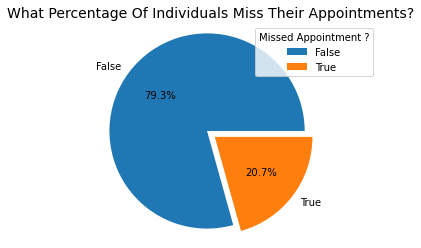

In [188]:
# plot the above count
pct_miss.plot(kind = 'pie',autopct='%1.1f%%',explode = [0.1,0], startangle = 0)
plt.axis('equal')
plt.ylabel("")
plt.legend(title = 'Missed Appointment ?')
plt.title('What Percentage Of Individuals Miss Their Appointments?', fontdict= {'fontsize':14});

In [189]:
# percentage of each gender that showed up for their appointments
g_show = df.groupby('cust_gender')['no_show'].value_counts(normalize = True) 
g_show


cust_gender  no_show
Female       False      0.794261
             True       0.205739
Male         False      0.792871
             True       0.207129
Name: no_show, dtype: float64

In [190]:
#Resetting the above groupby to a dataframe
g_show = g_show.reset_index(name = 'perc')
g_show

,cust_gender,no_show,perc
0,Female,False,0.794261
1,Female,True,0.205739
2,Male,False,0.792871
3,Male,True,0.207129


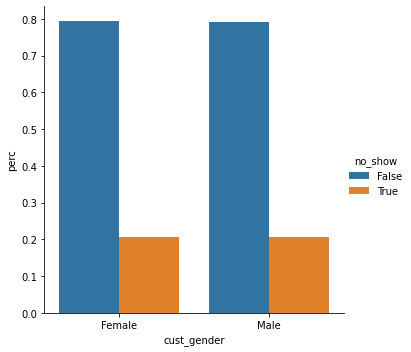

In [191]:
#Visualize the gender no show results
sns.catplot(data = g_show, x = 'cust_gender', y = 'perc', hue = 'no_show', kind = 'bar');

Does Wait time Contribute To Missed Appointments ?

In [192]:
# Show a summary of the wait time for people that showed up for their appointments

df.loc[df['no_show'] == False].days_waited.describe()

count    243004.000000
mean          9.503905
std           5.772472
min           0.000000
25%           4.000000
50%          10.000000
75%          15.000000
max          19.000000
Name: days_waited, dtype: float64

In [193]:
df.loc[df['no_show'] == True].days_waited.describe()

count    63346.000000
mean         9.504910
std          5.768895
min          0.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         19.000000
Name: days_waited, dtype: float64

In [194]:
# Check the average wait time for missed and honored appointments
wt_avg = df.groupby('no_show')['days_waited'].mean().reset_index()
wt_avg

,no_show,days_waited
0,False,9.503905
1,True,9.504910


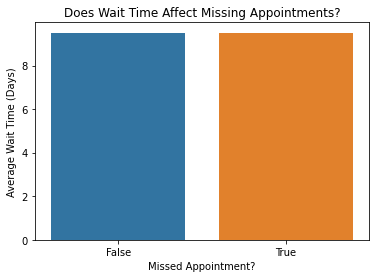

In [195]:
# Show a barplot of the data above
sns.barplot( data = wt_avg, x = 'no_show', y = 'days_waited')
plt.xlabel('Missed Appointment?')
plt.ylabel('Average Wait Time (Days)')
plt.title('Does Wait Time Affect Missing Appointments?');

# 0 - False, 1- True

In [196]:
# Count the percentage of appointments missed for different wait days
day_waited = df.groupby('days_waited')['no_show'].value_counts(normalize = True)
day_waited 

days_waited  no_show
0            False      0.791100
             True       0.208900
1            False      0.797510
             True       0.202490
2            False      0.793475
             True       0.206525
3            False      0.791024
             True       0.208976
4            False      0.798280
             True       0.201720
5            False      0.789807
             True       0.210193
6            False      0.788503
             True       0.211497
7            False      0.794830
             True       0.205170
8            False      0.788420
             True       0.211580
9            False      0.797996
             True       0.202004
10           False      0.799024
             True       0.200976
11           False      0.790667
             True       0.209333
12           False      0.795004
             True       0.204996
13           False      0.791173
             True       0.208827
14           False      0.793344
             True     

In [197]:
# Setting our groupby to a dataframe
day_waited  = df.groupby('days_waited')['no_show'].value_counts(normalize = True).reset_index(name = 'percentage')
day_waited  = day_waited.loc[day_waited['no_show'] == True]
day_waited

,days_waited,no_show,percentage
1,0,True,0.208900
3,1,True,0.202490
5,2,True,0.206525
7,3,True,0.208976
9,4,True,0.201720
11,5,True,0.210193
13,6,True,0.211497
15,7,True,0.205170
17,8,True,0.211580
19,9,True,0.202004


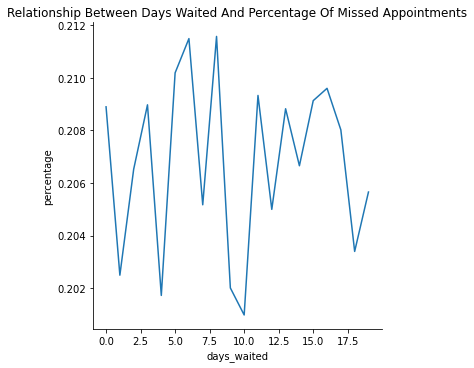

In [198]:
sns.relplot(data = day_waited, x = 'days_waited', y= 'percentage', kind = 'line')
plt.title('Relationship Between Days Waited And Percentage Of Missed Appointments');

Are SMS reminders effective in reducing no-show ?

In [199]:
df.sms_received.value_counts(normalize=True) * 100

True     78.061368
False    21.938632
Name: sms_received, dtype: float64

In [200]:
# Check the percentage of those that received sms reminders with a wait time greater than 10 days
df.query('days_waited > 10').sms_received.value_counts(normalize = True) *100

True     78.20973
False    21.79027
Name: sms_received, dtype: float64

In [201]:
# Check the if people with wait day longer than 10 days showed up and if they were reminded 
sms_response = df.query('days_waited > 10').groupby('sms_received')['no_show'].value_counts(normalize =True)*100
sms_response

sms_received  no_show
False         False      79.014277
              True       20.985723
True          False      79.342989
              True       20.657011
Name: no_show, dtype: float64

In [202]:
# Setting our groupby to a dataframe
sms_response = sms_response.reset_index(name = 'percentage')
sms_response

,sms_received,no_show,percentage
0,False,False,79.014277
1,False,True,20.985723
2,True,False,79.342989
3,True,True,20.657011


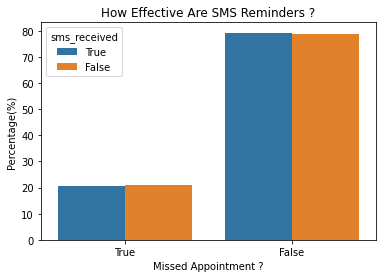

In [203]:
# plotting the values
sns.barplot(data = sms_response, x = 'no_show', y = 'percentage', hue = 'sms_received', 
            hue_order = [True, False], order = [True, False])
plt.xlabel('Missed Appointment ?')
plt.ylabel('Percentage(%)')
plt.title('How Effective Are SMS Reminders ?');

What Age Group Misses Appointments The Most?

In [204]:
# Group data by age and age groups and see what percentage Missed appointments
aptage =df.groupby(['cust_age','age_group'])['no_show'].value_counts(normalize = True)*100
aptage

cust_age  age_group  no_show
18        youth      False       78.305576
                     True        21.694424
19        youth      False       78.512047
                     True        21.487953
20        youth      False       78.695401
                     True        21.304599
21        youth      False       80.652547
                     True        19.347453
22        youth      False       79.200334
                     True        20.799666
23        youth      False       79.243439
                     True        20.756561
24        youth      False       79.986014
                     True        20.013986
25        adult      False       78.676574
                     True        21.323426
26        adult      False       79.767897
                     True        20.232103
27        adult      False       78.786199
                     True        21.213801
28        adult      False       78.325194
                     True        21.674806
29        adult      Fals

In [205]:
aptage = aptage.reset_index(name = 'percentage')
aptage

,cust_age,age_group,no_show,percentage
0,18,youth,False,78.305576
1,18,youth,True,21.694424
2,19,youth,False,78.512047
3,19,youth,True,21.487953
4,20,youth,False,78.695401
5,20,youth,True,21.304599
6,21,youth,False,80.652547
7,21,youth,True,19.347453
8,22,youth,False,79.200334
9,22,youth,True,20.799666


In [206]:
aptage_noshow = aptage.query('no_show == True')
aptage_noshow

,cust_age,age_group,no_show,percentage
1,18,youth,True,21.694424
3,19,youth,True,21.487953
5,20,youth,True,21.304599
7,21,youth,True,19.347453
9,22,youth,True,20.799666
11,23,youth,True,20.756561
13,24,youth,True,20.013986
15,25,adult,True,21.323426
17,26,adult,True,20.232103
19,27,adult,True,21.213801


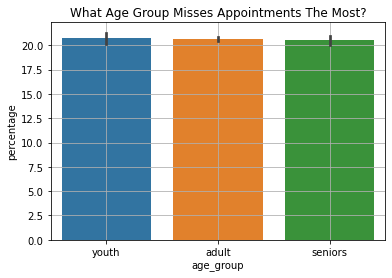

In [207]:
# Plotting the above data
sns.barplot(data = aptage_noshow, x = 'age_group', y = 'percentage')
plt.title("What Age Group Misses Appointments The Most?")
plt.grid();

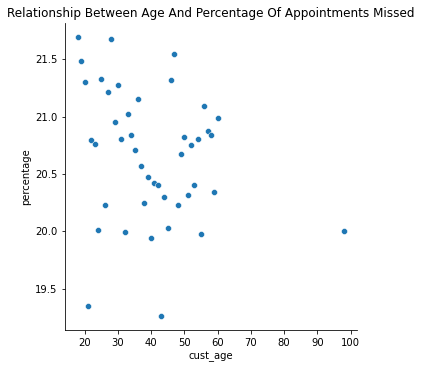

In [208]:
# Let's visualize the relationship between ages and the count of appoitments missed
sns.relplot(data = aptage_noshow, x = 'cust_age', y= 'percentage',kind = 'scatter')
plt.title('Relationship Between Age And Percentage Of Appointments Missed');

In [209]:
wkday_ns = df.groupby('appointment_day')['no_show'].value_counts(normalize =True)
wkday_ns

appointment_day  no_show
Weekday          False      0.793631
                 True       0.206369
Weekend          False      0.792211
                 True       0.207789
Name: no_show, dtype: float64

In [210]:
wkday_ns = df.groupby('appointment_day')['no_show'].value_counts(normalize =True).reset_index(name ='percentage') # resetting index in the grouping above
wkday_ns

,appointment_day,no_show,percentage
0,Weekday,False,0.793631
1,Weekday,True,0.206369
2,Weekend,False,0.792211
3,Weekend,True,0.207789


In [211]:
tech_show = df.groupby('technician_assigned')['no_show'].value_counts(normalize = True) 
tech_show


technician_assigned  no_show
0                    False      0.792841
                     True       0.207159
1                    False      0.793541
                     True       0.206459
Name: no_show, dtype: float64

In [212]:
tech_show = df.groupby('technician_assigned')['no_show'].value_counts(normalize = True).reset_index(name = 'percentage')
tech_show

,technician_assigned,no_show,percentage
0,0,False,0.792841
1,0,True,0.207159
2,1,False,0.793541
3,1,True,0.206459


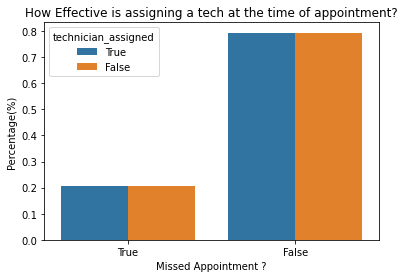

In [213]:
# plotting the values
sns.barplot(data = tech_show, x = 'no_show', y = 'percentage', hue = 'technician_assigned', 
            hue_order = [True, False], order = [True, False])
plt.xlabel('Missed Appointment ?')
plt.ylabel('Percentage(%)')
plt.title('How Effective is assigning a tech at the time of appointment?');

In [214]:
#group
ranges = [1,3,7,11]
labels = ['low', 'medium', 'High']
df['issue_criticality_group'] = pd.cut(df['issue_criticality'], bins = ranges, labels = labels, right = False)


In [215]:
issue_show = df.groupby('issue_criticality_group')['no_show'].value_counts(normalize = True) 
issue_show

issue_criticality_group  no_show
low                      False      0.720995
                         True       0.279005
medium                   False      0.720759
                         True       0.279241
High                     False      0.913315
                         True       0.086685
Name: no_show, dtype: float64

In [216]:
issue_show = issue_show.reset_index(name = 'percentage')
issue_show

,issue_criticality_group,no_show,percentage
0,low,False,0.720995
1,low,True,0.279005
2,medium,False,0.720759
3,medium,True,0.279241
4,High,False,0.913315
5,High,True,0.086685


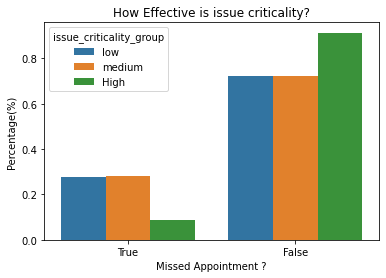

In [217]:
# plotting the values
sns.barplot(data = issue_show, x = 'no_show', y = 'percentage', hue = 'issue_criticality_group', 
            hue_order = ['low','medium','High'], order = [True, False])
plt.xlabel('Missed Appointment ?')
plt.ylabel('Percentage(%)')
plt.title('How Effective is issue criticality?');

In [218]:
newI_show = df.groupby('new_issue')['no_show'].value_counts(normalize = True) 
newI_show


new_issue  no_show
False      False      0.791129
           True       0.208871
True       False      0.793821
           True       0.206179
Name: no_show, dtype: float64

In [219]:
# Grouping and binning customer age, vehicle age, issue criticality and issue severity

ranges = [1,3,7,11]
labels = [0, 1, 2]
cust_age_range = [18,25,60,100]
cust_age_labels = [0, 1, 2]
vehicle_age_range = [0,10,20,30,100]
vehicle_age_labels = [0,1,2,3]

df['cust_age'] = pd.cut(df['cust_age'], bins = cust_age_range, labels = cust_age_labels, right = False)
df['vehicle_age'] = pd.cut(df['vehicle_age'], bins = vehicle_age_range, labels = vehicle_age_labels, right = False)
df['issue_criticality'] = pd.cut(df['issue_criticality'], bins = ranges, labels = labels, right = False)
df['issue_severity'] = pd.cut(df['issue_severity'], bins = ranges, labels = labels, right = False)
df.head()

,customer_id,appointment_id,cust_age,cust_gender,build_year,vehicle_age,vehicle_type,vehicle_oem,Appointment_Date,appointment_day,scheduled_date,scheduled_day,issue_arena,issue_criticality,issue_severity,last_serviced_date,no_show,sms_received,reminder_received,technician_assigned,new_issue,days_waited,age_group,issue_criticality_group
0,576784,4383521,1,Male,2015,0,SUV,Tesla,2022-07-14,Weekday,2022-07-20 02:33:00,Weekday,Replace remote battery,1,1,2019-05-16,False,True,True,1,True,6,adult,medium
1,4612731,2292304,1,Male,2020,0,Hatchback,Nissan,2022-02-03,Weekday,2022-02-22 02:00:00,Weekday,Engine repair,2,2,2020-09-22,False,True,False,0,True,19,adult,High
2,3055019,590799,1,Male,2008,1,Coupe,Audi,2022-03-22,Weekday,2022-03-25 06:32:00,Weekday,Resurface front rotors,1,2,2016-07-16,False,False,True,1,False,3,adult,medium
3,4116171,4493453,0,Female,2005,1,Convertible,Buick,2022-07-11,Weekday,2022-07-21 01:19:00,Weekday,Brake System repair,2,2,2009-06-11,False,False,True,0,True,10,youth,High
4,1312820,6728212,1,Female,2003,1,Sedan,Hyundai,2022-07-07,Weekday,2022-07-25 02:00:00,Weekday,Air Bag Repair,2,2,2007-10-25,False,False,False,1,True,18,adult,High


In [220]:
# Creating dummy variable for Vehicle Type

df['vehicle_type'].replace('Hatchback', 0, inplace=True)
df['vehicle_type'].replace(' Hatchback', 0, inplace=True)
df['vehicle_type'].replace('Minivan', 1, inplace=True)
df['vehicle_type'].replace(' Wagon', 2, inplace=True)
df['vehicle_type'].replace('Wagon', 2, inplace=True)
df['vehicle_type'].replace('SUV', 3, inplace=True)
df['vehicle_type'].replace('SUV1992', 3, inplace=True)
df['vehicle_type'].replace('SUV2020', 3, inplace=True)
df['vehicle_type'].replace(' Convertible', 4, inplace=True)
df['vehicle_type'].replace('Convertible', 4, inplace=True)
df['vehicle_type'].replace('Sedan', 5, inplace=True)
df['vehicle_type'].replace(' Sedan', 5, inplace=True)
df['vehicle_type'].replace('Van', 6, inplace=True)
df['vehicle_type'].replace('Pickup', 7, inplace=True)
df['vehicle_type'].replace('Coupe', 8, inplace=True)
df['vehicle_type'].replace(' Coupe', 8, inplace=True)

In [221]:
df.vehicle_type.unique()

array([3, 0, 8, 4, 5, 1, 6, 2, 7], dtype=int64)

In [222]:
# Converting boolean variables to binary/numeric 0/1

df['sms_received'].replace(True, 1,inplace=True)
df['sms_received'].replace(False, 0,inplace=True)
df['reminder_received'].replace(True, 1,inplace=True)
df['reminder_received'].replace(False, 0,inplace=True)
df['new_issue'].replace(True, 1,inplace=True)
df['new_issue'].replace(False, 0,inplace=True)
df['no_show'].replace(True,1,inplace=True)
df['no_show'].replace(False,0,inplace=True)
df['scheduled_day'].replace('Weekday', 0,inplace=True)
df['scheduled_day'].replace('Weekend', 1,inplace=True)
df['appointment_day'].replace('Weekday', 0,inplace=True)
df['appointment_day'].replace('Weekend', 1,inplace=True)
df['cust_gender'].replace('Female', 0,inplace=True)
df['cust_gender'].replace('Male', 1,inplace=True)
df.head()

,customer_id,appointment_id,cust_age,cust_gender,build_year,vehicle_age,vehicle_type,vehicle_oem,Appointment_Date,appointment_day,scheduled_date,scheduled_day,issue_arena,issue_criticality,issue_severity,last_serviced_date,no_show,sms_received,reminder_received,technician_assigned,new_issue,days_waited,age_group,issue_criticality_group
0,576784,4383521,1,1,2015,0,3,Tesla,2022-07-14,0,2022-07-20 02:33:00,0,Replace remote battery,1,1,2019-05-16,0,1,1,1,1,6,adult,medium
1,4612731,2292304,1,1,2020,0,0,Nissan,2022-02-03,0,2022-02-22 02:00:00,0,Engine repair,2,2,2020-09-22,0,1,0,0,1,19,adult,High
2,3055019,590799,1,1,2008,1,8,Audi,2022-03-22,0,2022-03-25 06:32:00,0,Resurface front rotors,1,2,2016-07-16,0,0,1,1,0,3,adult,medium
3,4116171,4493453,0,0,2005,1,4,Buick,2022-07-11,0,2022-07-21 01:19:00,0,Brake System repair,2,2,2009-06-11,0,0,1,0,1,10,youth,High
4,1312820,6728212,1,0,2003,1,5,Hyundai,2022-07-07,0,2022-07-25 02:00:00,0,Air Bag Repair,2,2,2007-10-25,0,0,0,1,1,18,adult,High


# Section 2 - Data Models

In [223]:
# Choosing specific columns for modeling in input dataframe
# Dropping correlated column 'build_year' and just keepung vehicle_age
# Dropping customer gender as it doesn't affect the target column

df_input = df[['cust_age','vehicle_type','vehicle_age','appointment_day','scheduled_day','sms_received','reminder_received',
               'issue_criticality','issue_severity','technician_assigned','new_issue']]
df_input

,cust_age,vehicle_type,vehicle_age,appointment_day,scheduled_day,sms_received,reminder_received,issue_criticality,issue_severity,technician_assigned,new_issue
0,1,3,0,0,0,1,1,1,1,1,1
1,1,0,0,0,0,1,0,2,2,0,1
2,1,8,1,0,0,0,1,1,2,1,0
3,0,4,1,0,0,0,1,2,2,0,1
4,1,5,1,0,0,0,0,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
316910,1,2,1,0,0,1,1,2,2,0,0
316911,1,5,0,1,0,1,1,1,1,1,1
316912,1,5,0,0,1,1,1,2,2,1,1
316913,1,7,2,0,1,0,0,2,2,0,0


In [224]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_input.cust_age = le.fit_transform(df_input.cust_age)
df_input.vehicle_age = le.fit_transform(df_input.vehicle_age)
df_input.issue_criticality = le.fit_transform(df_input.issue_criticality)
df_input.issue_severity = le.fit_transform(df_input.issue_severity)


# Split the data into training, validation and test sets


In [225]:
# Splitting dataframe into training, validation and test data

y = df['no_show']

train_X, temp_X, train_y, temp_y = train_test_split(df_input, y, test_size=0.5, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size=0.4, random_state=1)


print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)
print('Test : ', test_X.shape)

Training :  (153175, 11)
Validation :  (91905, 11)
Test :  (61270, 11)



# 1) K-NN Classifier

<AxesSubplot:xlabel='k'>

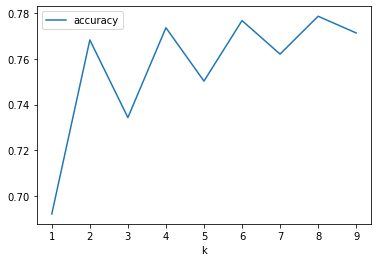

In [226]:
# kNN Algorithm to predict Show/No Show

results = []
for k in range(1, 10): # iterating over different values for k
        knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1).fit(train_X, train_y) #model 
        results.append({
            'k': k,
            'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results.sort_values(by='accuracy')
results.index=results.k
results=results.drop('k',axis=1)
results.plot()

In [227]:
# Train a classifier for different values of k and different types of distances

# This is very computationally heavy, we have run this code and used the results in the next step

metric_list=['euclidean','manhattan','chebyshev','minkowski',]
             
results = []
for k in range(1, 10):
    for m in metric_list:
        knn = KNeighborsClassifier(n_neighbors=k,metric=m,n_jobs=-1).fit(train_X, train_y)
        results.append({
            'k_distance': str(k)+" "+str(m),
            'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results.sort_values(by='accuracy',ascending=False)

,k_distance,accuracy
28,8 euclidean,0.778641
31,8 minkowski,0.778641
29,8 manhattan,0.778641
30,8 chebyshev,0.777966
23,6 minkowski,0.776748
21,6 manhattan,0.776748
20,6 euclidean,0.776748
22,6 chebyshev,0.775007
13,4 manhattan,0.773625
12,4 euclidean,0.773625


In [228]:
# Fit the model with training data with the best chosen value of k and distance measure type

knn = KNeighborsClassifier(n_neighbors=8,metric='euclidean',n_jobs=-1)
knn.fit(train_X, train_y)

# Predict 'y' value (no-show column) on validation and test data 

pred_y_valid = knn.predict(valid_X)
pred_y_test = knn.predict(test_X)


# K-NN: Confusion Matrix and Metrics Calculation

Confusion Matrix: [[46969  1503]
 [12216   582]]


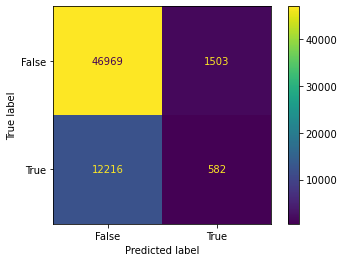

In [229]:
# Confusion Matrix for KNN

conf_matrix_knn = confusion_matrix(test_y, pred_y_test)
print("Confusion Matrix:",conf_matrix_knn)

# This matrix is different from the standard one
# In this confusion matrix,the count of true negatives is C[0,0], false negatives is C[1,0] , 
# true positives is C[1,1] and false positives is C[0,1]

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_knn, display_labels = [False, True])

cm_display.plot()
plt.show()


In [230]:
# Calculating Accuracy and Specificity for KNN

model_comparison = pd.DataFrame(columns = ["Accuracy","Specificity","False Positives","RMSE"],index = ["kNN","Logistic","Classification Trees","Random Forest","Extra Trees","Boosted Trees"])

total_knn = sum(sum(conf_matrix_knn))

# Accuracy = (TP+TN)/Total
model_comparison.loc['kNN','Accuracy'] = (conf_matrix_knn[1,1]+conf_matrix_knn[0,0])/total_knn

# Specificity = TN/(TN+FP)
model_comparison.loc['kNN','Specificity'] = conf_matrix_knn[0,0]/(conf_matrix_knn[0,0]+conf_matrix_knn[0,1])

# False Positives Absolute Number for impact analysis - We want to minimize this
model_comparison.loc['kNN','False Positives'] = conf_matrix_knn[0,1]

# RMSE
model_comparison.loc['kNN','RMSE'] = math.sqrt(mean_squared_error(test_y, pred_y_test))

print(model_comparison)


                      Accuracy Specificity False Positives      RMSE
kNN                   0.776089    0.968992            1503  0.473192
Logistic                   NaN         NaN             NaN       NaN
Classification Trees       NaN         NaN             NaN       NaN
Random Forest              NaN         NaN             NaN       NaN
Extra Trees                NaN         NaN             NaN       NaN
Boosted Trees              NaN         NaN             NaN       NaN


# 2) Logistic Regression

In [231]:
# Logistic Regression


model=LogisticRegression()
reg = model.fit(train_X, train_y)
pred_train = reg.predict(train_X)
pred_valid = reg.predict(valid_X)
pred_test = reg.predict(test_X)
print("\nTraning data")
print('accuracy: ',accuracy_score(train_y, pred_train))
print('Precision: ',precision_score(list(train_y),list(pred_train),pos_label=1))
print('Recall: ',recall_score(train_y,pred_train,pos_label=1))

print("\nValidation data")
print('accuracy: ',accuracy_score(valid_y,pred_valid))
print('Precision: ',precision_score(list(valid_y),list(pred_valid),pos_label=1))
print('Recall: ',recall_score(valid_y,pred_valid,pos_label=1))

print("\nTest data")
print('accuracy: ',accuracy_score(test_y, pred_test))
print('Precision: ',precision_score(list(test_y),list(pred_test),pos_label=1))
print('Recall: ',recall_score(test_y,pred_test,pos_label=1))



Traning data
accuracy:  0.7932626081279582
Precision:  0.0
Recall:  0.0

Validation data
accuracy:  0.7945595995865296
Precision:  0.0
Recall:  0.0

Test data
accuracy:  0.7911212665252163
Precision:  0.0
Recall:  0.0


# Logistic Regression: Confusion Matrix and Metrics Calculation

Confusion Matrix: [[48472     0]
 [12798     0]]


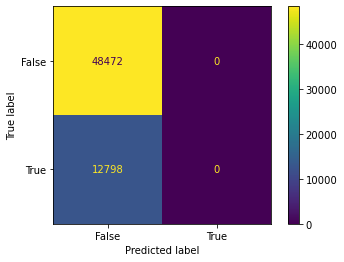

In [232]:
# Confusion Matrix for Logistic Regression

conf_matrix_logit = confusion_matrix(test_y, pred_test)
print("Confusion Matrix:",conf_matrix_logit)

# This matrix is different from the standard one
# In this confusion matrix,the count of true negatives is C[0,0], false negatives is C[1,0] , 
# true positives is C[1,1] and false positives is C[0,1]

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_logit, display_labels = [False, True])

cm_display.plot()
plt.show()

# Everything is being predcited as '1' or +ve because no-show column is heavily biased towards '1' value

In [233]:
# Calculating Accuracy and Specificity for Logistic Regression

total_logit = sum(sum(conf_matrix_logit))

# Accuracy = (TP+TN)/Total
model_comparison.loc['Logistic','Accuracy'] = (conf_matrix_logit[1,1]+conf_matrix_logit[0,0])/total_logit

# Specificity = TN/(TN+FP)
model_comparison.loc['Logistic','Specificity'] = conf_matrix_logit[0,0]/(conf_matrix_logit[0,0]+conf_matrix_logit[0,1])

# False Positives Absolute Number for impact analysis - We want to minimize this
model_comparison.loc['Logistic','False Positives'] = conf_matrix_logit[0,1]

# RMSE

model_comparison.loc['Logistic','RMSE'] = math.sqrt(mean_squared_error(test_y, pred_test))

print(model_comparison)


                      Accuracy Specificity False Positives      RMSE
kNN                   0.776089    0.968992            1503  0.473192
Logistic              0.791121         1.0               0  0.457033
Classification Trees       NaN         NaN             NaN       NaN
Random Forest              NaN         NaN             NaN       NaN
Extra Trees                NaN         NaN             NaN       NaN
Boosted Trees              NaN         NaN             NaN       NaN


# 3) Decision Trees

Training Accuracy:  80.69332462869268
Precision:  0.7895464601769911
Recall:  0.09015694571636088
RMSE:  0.43939362047379943
Validation Accuracy:  78.14373537892388
Precision:  0.2638997650743931
Recall:  0.03569726179757428
RMSE:  0.46750684081707417
Test Accuracy:  77.92231108209565
Precision:  0.28002414001207
Recall:  0.03625566494764807
RMSE:  0.4698690127887171
                                features  importance
features                                            
issue_criticality      issue_criticality    0.390854
vehicle_type                vehicle_type    0.130689
technician_assigned  technician_assigned    0.071843
appointment_day          appointment_day    0.067937
scheduled_day              scheduled_day    0.062690
20


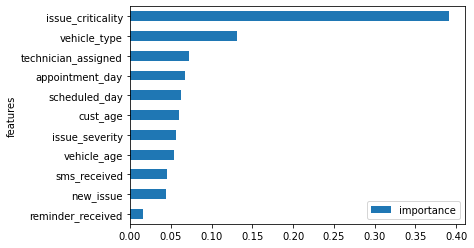

In [234]:
dtree = DecisionTreeClassifier()
dtree.fit(train_X, train_y)  #train parameters: features and target


pred = dtree.predict(train_X)  #parameter: new data to predict
print("Training Accuracy: " , accuracy_score(train_y, pred)*100)
print('Precision: ',precision_score(list(train_y),list(dtree.predict(train_X)),pos_label=1))
print('Recall: ',recall_score(train_y,dtree.predict(train_X),pos_label=1))
print('RMSE: ',(mean_squared_error(train_y, dtree.predict(train_X))**.5))

pred = dtree.predict(valid_X)  #parameter: new data to predict
print("Validation Accuracy: " , accuracy_score(valid_y, pred)*100)
print('Precision: ',precision_score(list(valid_y),list(dtree.predict(valid_X)),pos_label=1))
print('Recall: ',recall_score(valid_y,dtree.predict(valid_X),pos_label=1))
print('RMSE: ',(mean_squared_error(valid_y, dtree.predict(valid_X))**.5))

pred = dtree.predict(test_X)  #parameter: new data to predict
print("Test Accuracy: " , accuracy_score(test_y, pred)*100)
print('Precision: ',precision_score(list(test_y),list(dtree.predict(test_X)),pos_label=1))
print('Recall: ',recall_score(test_y,dtree.predict(test_X),pos_label=1))
print('RMSE: ',(mean_squared_error(test_y, dtree.predict(test_X))**.5))


# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': dtree.feature_importances_})
importance.index=importance.features
importance.sort_values(by='importance', ascending=True).plot.barh()
a=importance.sort_values(by='importance', ascending=False)
print(a.head())

print(dtree.tree_.max_depth)



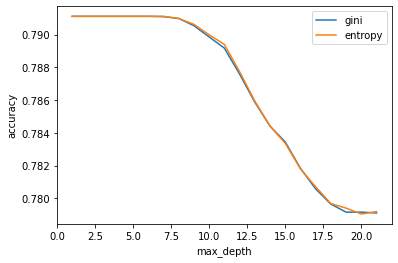

In [236]:
# Finding the appropriate depth of tree
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,22):
 dtree = DecisionTreeClassifier(criterion="gini", max_depth=i)
 dtree.fit(train_X,train_y)
 pred = dtree.predict(test_X)
 acc_gini.append(accuracy_score(test_y, pred))
 ####
 dtree = DecisionTreeClassifier(criterion="entropy", max_depth=i)
 dtree.fit(train_X,train_y)
 pred = dtree.predict(test_X)
 acc_entropy.append(accuracy_score(test_y, pred))
 ####
 max_depth.append(i)
 d = pd.DataFrame({"acc_gini":pd.Series(acc_gini), "acc_entropy":pd.Series(acc_entropy),"max_depth":pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot("max_depth","acc_gini", data=d, label="gini")
plt.plot("max_depth","acc_entropy", data=d, label="entropy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()

Training Accuracy:  0.7932626081279582
Precision:  0.0
Recall:  0.0
RMSE:  0.4546838372672178
Validation Accuracy:  0.7945595995865296
Precision:  0.0
Recall:  0.0
RMSE:  0.4532553368836052
Test Accuracy:  0.7911212665252163
Precision:  0.0
Recall:  0.0
RMSE:  0.4570325299962616
                            features  importance
features                                        
issue_criticality  issue_criticality    0.995405
cust_age                    cust_age    0.000947
issue_severity        issue_severity    0.000937
vehicle_age              vehicle_age    0.000780
new_issue                  new_issue    0.000571


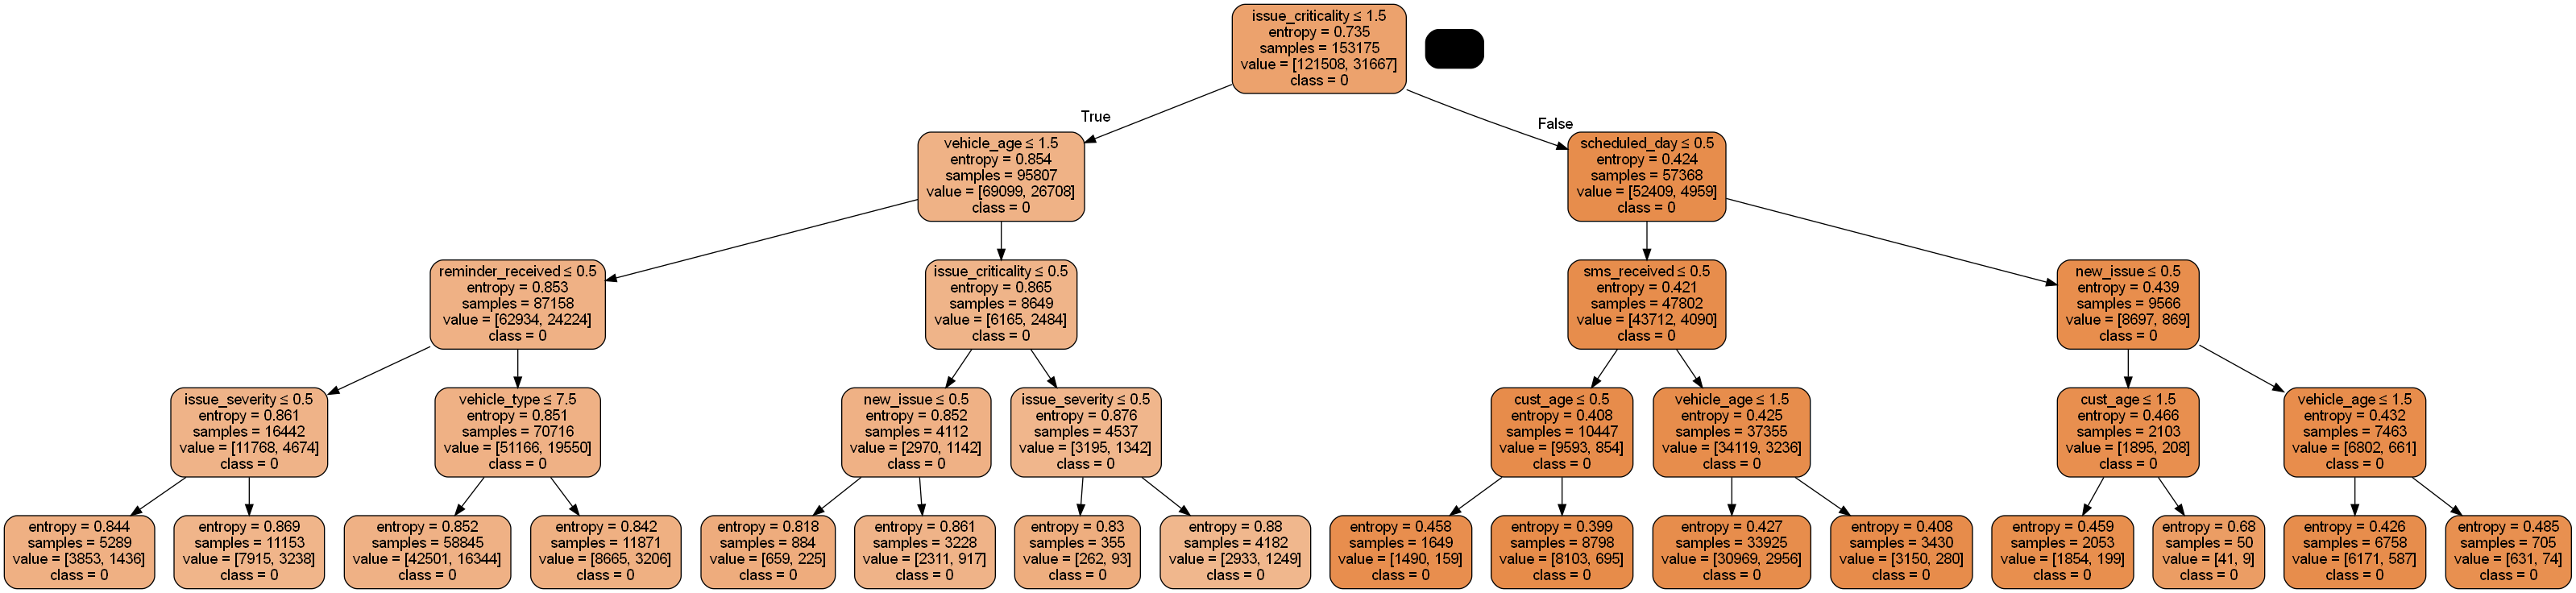

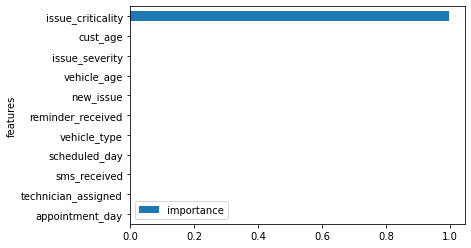

In [237]:
# Pruning the tree

dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dtree.fit(train_X, train_y)
pred = dtree.predict(train_X)
print("Training Accuracy: " , accuracy_score(train_y, pred))
print('Precision: ',precision_score(list(train_y),list(dtree.predict(train_X)),pos_label=1))
print('Recall: ',recall_score(train_y,dtree.predict(train_X),pos_label=1))
print('RMSE: ',(mean_squared_error(train_y, dtree.predict(train_X))**.5))

pred = dtree.predict(valid_X)  #parameter: new data to predict
print("Validation Accuracy: " , accuracy_score(valid_y, pred))
print('Precision: ',precision_score(list(valid_y),list(dtree.predict(valid_X)),pos_label=1))
print('Recall: ',recall_score(valid_y,dtree.predict(valid_X),pos_label=1))
print('RMSE: ',(mean_squared_error(valid_y, dtree.predict(valid_X))**.5))

pred = dtree.predict(test_X)  #parameter: new data to predict
print("Test Accuracy: " , accuracy_score(test_y, pred))
print('Precision: ',precision_score(list(test_y),list(dtree.predict(test_X)),pos_label=1))
print('Recall: ',recall_score(test_y,dtree.predict(test_X),pos_label=1))
print('RMSE: ',(mean_squared_error(test_y, dtree.predict(test_X))**.5))


# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': dtree.feature_importances_})
importance.index=importance.features
importance.sort_values(by='importance', ascending=True).plot.barh()
a=importance.sort_values(by='importance', ascending=False)
print(a.head())
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
feature_cols=['cust_age','vehicle_type','vehicle_age','appointment_day','scheduled_day','sms_received','reminder_received',
               'issue_criticality','issue_severity','technician_assigned','new_issue']

#export_graphviz(dtree, out_file=dot_data)


export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names= feature_cols , class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

# Decision Trees: Confusion Matrix and Metrics Calculation

Confusion Matrix: [[48472     0]
 [12798     0]]


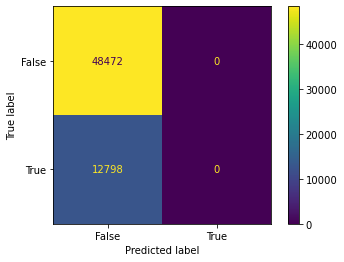

                      Accuracy Specificity False Positives      RMSE
kNN                   0.776089    0.968992            1503  0.473192
Logistic              0.791121         1.0               0  0.457033
Classification Trees  0.791121         1.0               0  0.457033
Random Forest              NaN         NaN             NaN       NaN
Extra Trees                NaN         NaN             NaN       NaN
Boosted Trees              NaN         NaN             NaN       NaN


In [238]:
# Confusion Matrix for Classification Trees
    
conf_matrix_CT = confusion_matrix(test_y, dtree.predict(test_X))
print("Confusion Matrix:",conf_matrix_CT)

# This matrix is different from the standard one
# In this confusion matrix,the count of true negatives is C[0,0], false negatives is C[1,0] , 
# true positives is C[1,1] and false positives is C[0,1]

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_CT, display_labels = [False, True])

cm_display.plot()
plt.show()
    
    
# Calculating Accuracy and Specificity for Classification Trees

total_CT = sum(sum(conf_matrix_CT))

# Accuracy = (TP+TN)/Total
model_comparison.loc['Classification Trees','Accuracy'] = (conf_matrix_CT[1,1]+conf_matrix_CT[0,0])/total_CT

# Specificity = TN/(TN+FP)
model_comparison.loc['Classification Trees','Specificity'] = conf_matrix_CT[0,0]/(conf_matrix_CT[0,0]+conf_matrix_CT[0,1])

# False Positives Absolute Number for impact analysis - We want to minimize this
model_comparison.loc['Classification Trees','False Positives'] = conf_matrix_CT[0,1]


# RMSE
model_comparison.loc['Classification Trees','RMSE'] = math.sqrt(mean_squared_error(test_y, dtree.predict(test_X)))

print(model_comparison)

# 4) Random Forest

Training Accuracy:  0.8069332462869268
Precision:  0.7188545150501672
Recall:  0.10859885685413838
RMSE:  0.43939362047379943
Validation Accuracy:  0.7807953865404493
Precision:  0.27075027183762235
Recall:  0.0395635824373709
RMSE:  0.4681929233334808
Test Accuracy:  0.7777215603068386
Precision:  0.2770233568712656
Recall:  0.03984997655883732
RMSE:  0.471464144652763
                            features  importance
features                                        
vehicle_type            vehicle_type    0.281802
issue_criticality  issue_criticality    0.225779
issue_severity        issue_severity    0.122763
vehicle_age              vehicle_age    0.077208
cust_age                    cust_age    0.065982


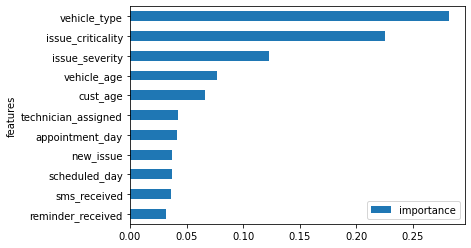

In [239]:
from sklearn.ensemble import RandomForestClassifier

rftree = RandomForestClassifier()
rftree.fit(train_X, train_y)  #train parameters: features and target


pred = rftree.predict(train_X)  #parameter: new data to predict
print("Training Accuracy: " , accuracy_score(train_y, pred))
print('Precision: ',precision_score(list(train_y),list(rftree.predict(train_X)),pos_label=1))
print('Recall: ',recall_score(train_y,rftree.predict(train_X),pos_label=1))
print('RMSE: ',(mean_squared_error(train_y, rftree.predict(train_X))**.5))

pred = rftree.predict(valid_X)  #parameter: new data to predict
print("Validation Accuracy: " , accuracy_score(valid_y, pred))
print('Precision: ',precision_score(list(valid_y),list(rftree.predict(valid_X)),pos_label=1))
print('Recall: ',recall_score(valid_y,rftree.predict(valid_X),pos_label=1))
print('RMSE: ',(mean_squared_error(valid_y, rftree.predict(valid_X))**.5))

pred = rftree.predict(test_X)  #parameter: new data to predict
print("Test Accuracy: " , accuracy_score(test_y, pred))
print('Precision: ',precision_score(list(test_y),list(rftree.predict(test_X)),pos_label=1))
print('Recall: ',recall_score(test_y,rftree.predict(test_X),pos_label=1))
print('RMSE: ',(mean_squared_error(test_y, rftree.predict(test_X))**.5))


# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': rftree.feature_importances_})
importance.index=importance.features
importance.sort_values(by='importance', ascending=True).plot.barh()
a=importance.sort_values(by='importance', ascending=False)
print(a.head())



# Random Forest: Confusion Matrix and Metrics Calculation

Confusion Matrix: [[47141  1331]
 [12288   510]]


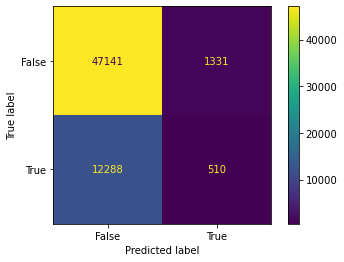

                      Accuracy Specificity False Positives      RMSE
kNN                   0.776089    0.968992            1503  0.473192
Logistic              0.791121         1.0               0  0.457033
Classification Trees  0.791121         1.0               0  0.457033
Random Forest         0.777722    0.972541            1331  0.471464
Extra Trees                NaN         NaN             NaN       NaN
Boosted Trees              NaN         NaN             NaN       NaN


In [240]:
# Confusion Matrix for Random Forest
    
conf_matrix_RF = confusion_matrix(test_y, rftree.predict(test_X))
print("Confusion Matrix:",conf_matrix_RF)

# This matrix is different from the standard one
# In this confusion matrix,the count of true negatives is C[0,0], false negatives is C[1,0] , 
# true positives is C[1,1] and false positives is C[0,1]

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_RF, display_labels = [False, True])

cm_display.plot()
plt.show()
    
    
# Calculating Accuracy and Specificity for Random Forest

total_RF = sum(sum(conf_matrix_RF))

# Accuracy = (TP+TN)/Total
model_comparison.loc['Random Forest','Accuracy'] = (conf_matrix_RF[1,1]+conf_matrix_RF[0,0])/total_RF

# Specificity = TN/(TN+FP)
model_comparison.loc['Random Forest','Specificity'] = conf_matrix_RF[0,0]/(conf_matrix_RF[0,0]+conf_matrix_RF[0,1])

# False Positives Absolute Number for impact analysis - We want to minimize this
model_comparison.loc['Random Forest','False Positives'] = conf_matrix_RF[0,1]

# RMSE
model_comparison.loc['Random Forest','RMSE'] = math.sqrt(mean_squared_error(test_y, rftree.predict(test_X)))

print(model_comparison)

# 5) Extra Trees

Training Accuracy:  0.8069332462869268
Precision:  0.7895464601769911
Recall:  0.09015694571636088
RMSE:  0.43939362047379943
Validation Accuracy:  0.7830041891083184
Precision:  0.2721030042918455
Recall:  0.03357872994015147
RMSE:  0.465828091565635
Test Accuracy:  0.7796801044556879
Precision:  0.2751763951250802
Recall:  0.03352086263478669
RMSE:  0.4693824619053337
                            features  importance
features                                        
vehicle_type            vehicle_type    0.312976
issue_criticality  issue_criticality    0.255336
issue_severity        issue_severity    0.147528
vehicle_age              vehicle_age    0.067048
cust_age                    cust_age    0.063101


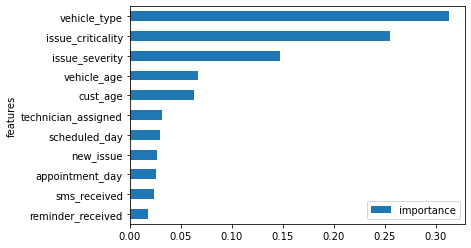

In [241]:
from sklearn.ensemble import ExtraTreesClassifier

ettree = ExtraTreesClassifier()
ettree.fit(train_X, train_y)  #train parameters: features and target


pred = ettree.predict(train_X)  #parameter: new data to predict
print("Training Accuracy: " , accuracy_score(train_y, pred))
print('Precision: ',precision_score(list(train_y),list(ettree.predict(train_X)),pos_label=1))
print('Recall: ',recall_score(train_y,ettree.predict(train_X),pos_label=1))
print('RMSE: ',(mean_squared_error(train_y, ettree.predict(train_X))**.5))

pred = ettree.predict(valid_X)  #parameter: new data to predict
print("Validation Accuracy: " , accuracy_score(valid_y, pred))
print('Precision: ',precision_score(list(valid_y),list(ettree.predict(valid_X)),pos_label=1))
print('Recall: ',recall_score(valid_y,ettree.predict(valid_X),pos_label=1))
print('RMSE: ',(mean_squared_error(valid_y, ettree.predict(valid_X))**.5))

pred = ettree.predict(test_X)  #parameter: new data to predict
print("Test Accuracy: " , accuracy_score(test_y, pred))
print('Precision: ',precision_score(list(test_y),list(ettree.predict(test_X)),pos_label=1))
print('Recall: ',recall_score(test_y,ettree.predict(test_X),pos_label=1))
print('RMSE: ',(mean_squared_error(test_y, ettree.predict(test_X))**.5))


# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': ettree.feature_importances_})
importance.index=importance.features
importance.sort_values(by='importance', ascending=True).plot.barh()
a=importance.sort_values(by='importance', ascending=False)
print(a.head())

# Extra Trees: Confusion Matrix and Metrics Calculation

Confusion Matrix: [[47342  1130]
 [12369   429]]


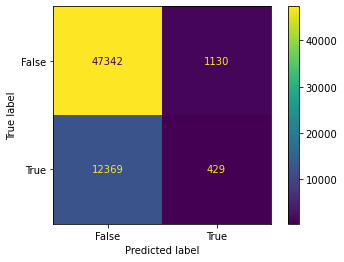

                      Accuracy Specificity False Positives      RMSE
kNN                   0.776089    0.968992            1503  0.473192
Logistic              0.791121         1.0               0  0.457033
Classification Trees  0.791121         1.0               0  0.457033
Random Forest         0.777722    0.972541            1331  0.471464
Extra Trees            0.77968    0.976688            1130  0.469382
Boosted Trees              NaN         NaN             NaN       NaN


In [242]:
# Confusion Matrix for Extra Trees
    
conf_matrix_ET = confusion_matrix(test_y, ettree.predict(test_X))
print("Confusion Matrix:",conf_matrix_ET)

# This matrix is different from the standard one
# In this confusion matrix,the count of true negatives is C[0,0], false negatives is C[1,0] , 
# true positives is C[1,1] and false positives is C[0,1]

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_ET, display_labels = [False, True])

cm_display.plot()
plt.show()
    
    
# Calculating Accuracy and Specificity for Extra Trees

total_ET = sum(sum(conf_matrix_ET))

# Accuracy = (TP+TN)/Total
model_comparison.loc['Extra Trees','Accuracy'] = (conf_matrix_ET[1,1]+conf_matrix_ET[0,0])/total_ET

# Specificity = TN/(TN+FP)
model_comparison.loc['Extra Trees','Specificity'] = conf_matrix_ET[0,0]/(conf_matrix_ET[0,0]+conf_matrix_ET[0,1])

# False Positives Absolute Number for impact analysis - We want to minimize this
model_comparison.loc['Extra Trees','False Positives'] = conf_matrix_ET[0,1]

# RMSE
model_comparison.loc['Extra Trees','RMSE'] = math.sqrt(mean_squared_error(test_y, ettree.predict(test_X)))

print(model_comparison)

# 6) XGBoost (Extreme Gradient Boosting) 

In [243]:
#pip install xgboost

Accuracy: 79.38%
Precision:  0.2919254658385093
Recall:  0.002489274932471797
RMSE:  0.45405882225640704
Accuracy: 79.04%
Precision:  0.2761904761904762
Recall:  0.0022659790592280044
RMSE:  0.45787097520271264
                                features  importance
features                                            
issue_criticality      issue_criticality    0.791560
scheduled_day              scheduled_day    0.022503
new_issue                      new_issue    0.022142
technician_assigned  technician_assigned    0.021630
vehicle_type                vehicle_type    0.021265


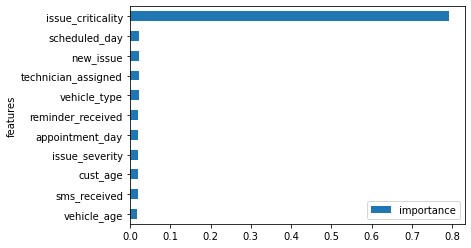

In [244]:
import xgboost as xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# fit model no training data
model = XGBClassifier()
xgb_model = model.fit(train_X, train_y)
# make predictions for test data
y_pred = model.predict(valid_X)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(valid_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Precision: ',precision_score(list(valid_y),list(xgb_model.predict(valid_X)),pos_label=1))
print('Recall: ',recall_score(valid_y,xgb_model.predict(valid_X),pos_label=1))
print('RMSE: ',(mean_squared_error(valid_y, xgb_model.predict(valid_X))**.5))

# make predictions for test data
y_pred = xgb_model.predict(test_X)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Precision: ',precision_score(list(test_y),list(xgb_model.predict(test_X)),pos_label=1))
print('Recall: ',recall_score(test_y,xgb_model.predict(test_X),pos_label=1))
print('RMSE: ',(mean_squared_error(test_y, xgb_model.predict(test_X))**.5))

train_X = pd.DataFrame(train_X)
# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': xgb_model.feature_importances_})
importance.index=importance.features
importance.sort_values(by='importance', ascending=True).plot.barh()
a=importance.sort_values(by='importance', ascending=False)
print(a.head())

# Boosted Trees: Confusion Matrix and Metrics Calculation

Confusion Matrix: [[48396    76]
 [12769    29]]


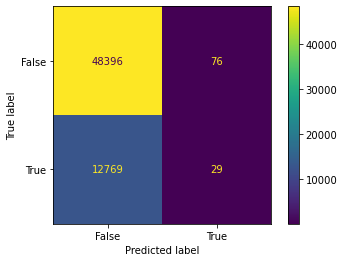

                      Accuracy Specificity False Positives      RMSE
kNN                   0.776089    0.968992            1503  0.473192
Logistic              0.791121         1.0               0  0.457033
Classification Trees  0.791121         1.0               0  0.457033
Random Forest         0.777722    0.972541            1331  0.471464
Extra Trees            0.77968    0.976688            1130  0.469382
Boosted Trees         0.790354    0.998432              76  0.457871


In [245]:
# Confusion Matrix for Extra Trees
    
conf_matrix_BT = confusion_matrix(test_y, xgb_model.predict(test_X))
print("Confusion Matrix:",conf_matrix_BT)

# This matrix is different from the standard one
# In this confusion matrix,the count of true negatives is C[0,0], false negatives is C[1,0] , 
# true positives is C[1,1] and false positives is C[0,1]

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_BT, display_labels = [False, True])

cm_display.plot()
plt.show()
    
    
# Calculating Accuracy and Specificity for Extra Trees

total_BT = sum(sum(conf_matrix_BT))

# Accuracy = (TP+TN)/Total
model_comparison.loc['Boosted Trees','Accuracy'] = (conf_matrix_BT[1,1]+conf_matrix_BT[0,0])/total_BT

# Specificity = TN/(TN+FP)
model_comparison.loc['Boosted Trees','Specificity'] = conf_matrix_BT[0,0]/(conf_matrix_BT[0,0]+conf_matrix_BT[0,1])

# False Positives Absolute Number for impact analysis - We want to minimize this
model_comparison.loc['Boosted Trees','False Positives'] = conf_matrix_BT[0,1]

# RMSE
model_comparison.loc['Boosted Trees','RMSE'] = math.sqrt(mean_squared_error(test_y, xgb_model.predict(test_X)))

print(model_comparison)